Q1. What is the mathematical formula for a linear SVM?
The mathematical formula for a linear Support Vector Machine (SVM) can be represented as:

𝑓
(
𝑥
)
=
𝑤
𝑇
𝑥
+
𝑏
f(x)=w
T
 x+b

where:

𝑤
w is the weight vector.
𝑥
x is the input feature vector.
𝑏
b is the bias term.
Q2. What is the objective function of a linear SVM?
The objective function of a linear SVM is to find the hyperplane that maximizes the margin between the classes while minimizing classification error. This can be formulated as:

min
⁡
𝑤
,
𝑏
1
2
∥
𝑤
∥
2
+
𝐶
∑
𝑖
=
1
𝑛
𝜉
𝑖
min
w,b
​
  
2
1
​
 ∥w∥
2
 +C∑
i=1
n
​
 ξ
i
​


subject to the constraints:

𝑦
𝑖
(
𝑤
𝑇
𝑥
𝑖
+
𝑏
)
≥
1
−
𝜉
𝑖
,
𝜉
𝑖
≥
0
y
i
​
 (w
T
 x
i
​
 +b)≥1−ξ
i
​
 ,ξ
i
​
 ≥0

where:

𝐶
C is the regularization parameter.
𝜉
𝑖
ξ
i
​
  are the slack variables to allow for some misclassifications.
𝑦
𝑖
y
i
​
  are the class labels.
Q3. What is the kernel trick in SVM?
The kernel trick allows SVMs to efficiently perform classification in higher-dimensional spaces without explicitly mapping the data points to those spaces. This is achieved by using a kernel function
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
K(x
i
​
 ,x
j
​
 ) that computes the dot product of the data points in the higher-dimensional space. Common kernels include the linear, polynomial, radial basis function (RBF), and sigmoid kernels.

Q4. What is the role of support vectors in SVM? Explain with an example.
Support vectors are the data points that lie closest to the decision boundary (hyperplane) and are critical in defining the position and orientation of the hyperplane. They are the data points that directly influence the optimal hyperplane.

Example:

Imagine a 2D binary classification problem where two classes are separated by a linear boundary. The support vectors are the points from each class that are closest to this boundary. If these points are moved slightly, the position of the boundary will change.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.

To visualize these concepts, we can create plots using a simple dataset. Let's use the make_blobs function from sklearn.datasets to generate a binary classification dataset and plot the SVM decision boundaries with different margin settings.

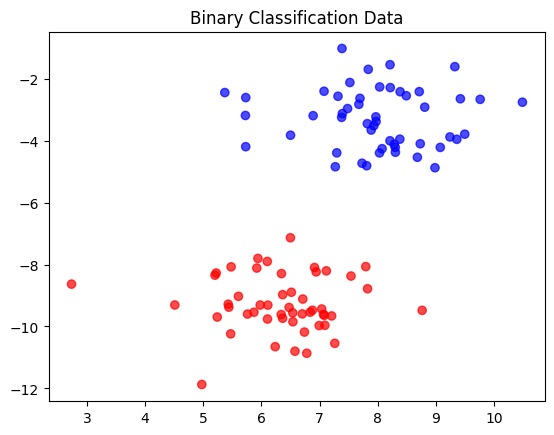

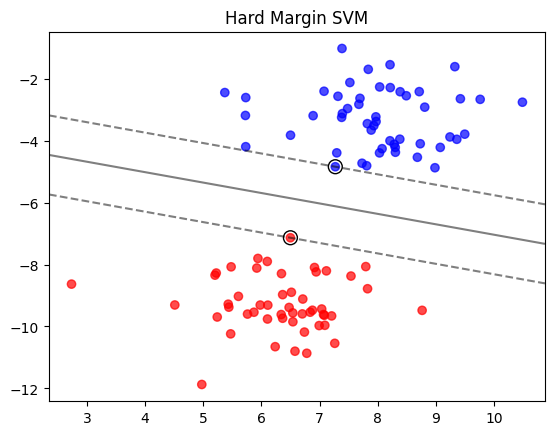

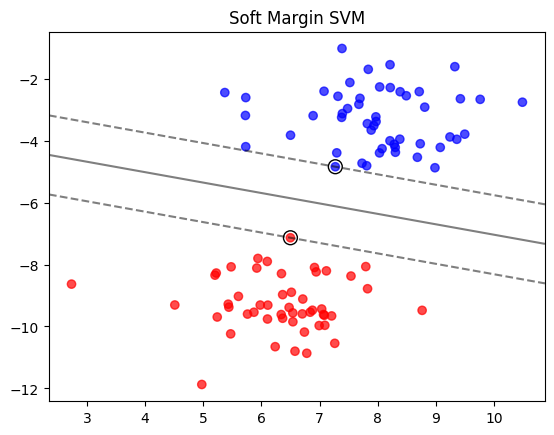

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('Binary Classification Data')
plt.show()

# Train an SVM with a hard margin
svc_hard = SVC(kernel='linear', C=1e10)
svc_hard.fit(X, y)

# Plot decision boundary and margins for hard margin
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_hard.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svc_hard.support_vectors_[:, 0], svc_hard.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Hard Margin SVM')
plt.show()

# Train an SVM with a soft margin
svc_soft = SVC(kernel='linear', C=1)
svc_soft.fit(X, y)

# Plot decision boundary and margins for soft margin
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_soft.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svc_soft.support_vectors_[:, 0], svc_soft.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Soft Margin SVM')
plt.show()


Q6. SVM Implementation through Iris dataset
Let's implement the steps for training and evaluating a linear SVM classifier on the Iris dataset.


Load the iris dataset and split it into a training set and a testing set

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Train a linear SVM
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svc.predict(X_test)


In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


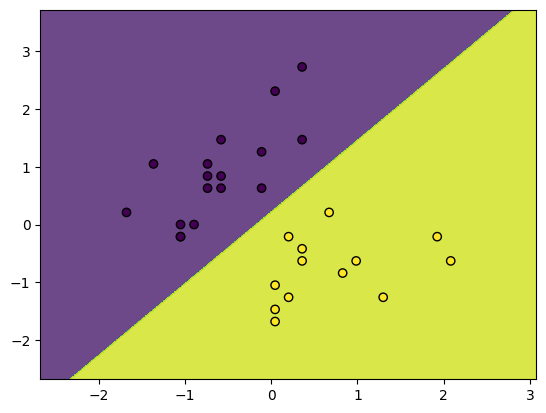

In [5]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

# Use only the first two features for visualization
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]
svc_vis = SVC(kernel='linear', C=1)
svc_vis.fit(X_train_vis, y_train)

plot_decision_boundary(svc_vis, X_test_vis, y_test)


In [6]:
for C in [0.1, 1, 10, 100]:
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C} Accuracy: {accuracy}')


C=0.1 Accuracy: 1.0
C=1 Accuracy: 1.0
C=10 Accuracy: 1.0
C=100 Accuracy: 1.0


Bonus Task: Implement a linear SVM classifier from scratch

Implementing a linear SVM classifier from scratch involves using optimization techniques like gradient descent to minimize the objective function. Here is a simple implementation using Python and NumPy.

In [7]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Train and evaluate the custom SVM
svm = LinearSVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Custom SVM Accuracy: {accuracy}')

# Compare with scikit-learn implementation
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
predictions_sklearn = svc.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print(f'scikit-learn SVM Accuracy: {accuracy_sklearn}')


Custom SVM Accuracy: 0.43333333333333335
scikit-learn SVM Accuracy: 1.0
